## <font color = green> BigMart Data Analysis - Build a predictive model to find out the sales of each product at a particular store:

### Problem Statement:

The task is to build a predictive model that can estimate the sales of each product at a particular store for BigMart. The data comprises sales information of 2013 sales data for 1559 products across 10 stores in different cities,along with various attributes for each product and store. 

### Project Goals:

Build a predictive model capable of estimating product sales at specific stores.
Understand the key attributes of both products and stores that significantly influence sales.
Provide insights to help BigMart strategize and enhance sales performance.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Challenges:

Though the dataset contains missing values it is required appropriate handling to ensure accurate model training.
Identifying the most influential features is crucial for model interpretability as the Products and stores have diverse attributes .

### <font color = blue>  Import the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Regression algorithms:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# Analysis of Regression algorithms:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Model Selection
from sklearn.model_selection import GridSearchCV

# Remove warnings:
import warnings
warnings.filterwarnings('ignore')

## <font color = green>Load the Train dataset into python environment :

In [2]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\Internship LinkedIn\Train.csv') 

### <font color = blue> Perform Data Understanding:

In [3]:
# View first 10 rows of data

data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Dimension of dataset

data.shape

(8523, 12)

In [5]:
# Information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Summarize the data by generating descriptive statistics of Numerical Columns

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Summarize the data by generating descriptive statistics of Categorical columns

data.describe(include = object).transpose()

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


### <font color = blue> Feature Description: 

In [8]:
# Number of numerical columns & Number of categorical columns in the DataFrame

numerical_columns = data.select_dtypes(include=['float', 'int']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 5
Number of Categorical Columns: 7


1. Item_Identifier(Categorical): Unique identifier for each product.
2. Item_Weight( Numerical): Weight of the product.
3. Item_Fat_Content(Categorical): Categorical variable indicating the fat content of the product.
4. Item_Visibility( Numerical): Percentage of total display area in the store allocated to the particular product.
5. Item_Type(Categorical): Categorical variable indicating the category of the product.
6. Item_MRP( Numerical): Maximum Retail Price (MRP) of the product.
7. Outlet_Identifier(Categorical): Unique identifier for each store.
8. Outlet_Establishment_Year(Temporal variable): The year in which the store was established.
9. Outlet_Size(Categorical): Categorical variable indicating the size of the store.
10. Outlet_Location_Type(Categorical): Categorical variable indicating the location type of the store.
11. Outlet_Type(Categorical): Categorical variable indicating the type of the store.
12. Item_Outlet_Sales( Numerical): The target variable representing the sales of the product at the particular store.

## <font color = blue>  Exploratory Data Analysis:

### Unique values: 

In [9]:
# Iterate over the columns

for column in data.columns:
    # Get the unique values for the column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Item_Identifier
Unique Values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
-----------------------
Column: Item_Weight
Unique Values: [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88

### Counts of unique values:

In [10]:
print("Number of Unique Values in Each Column:")
print(data.nunique())

Number of Unique Values in Each Column:
Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


### Visualization: 

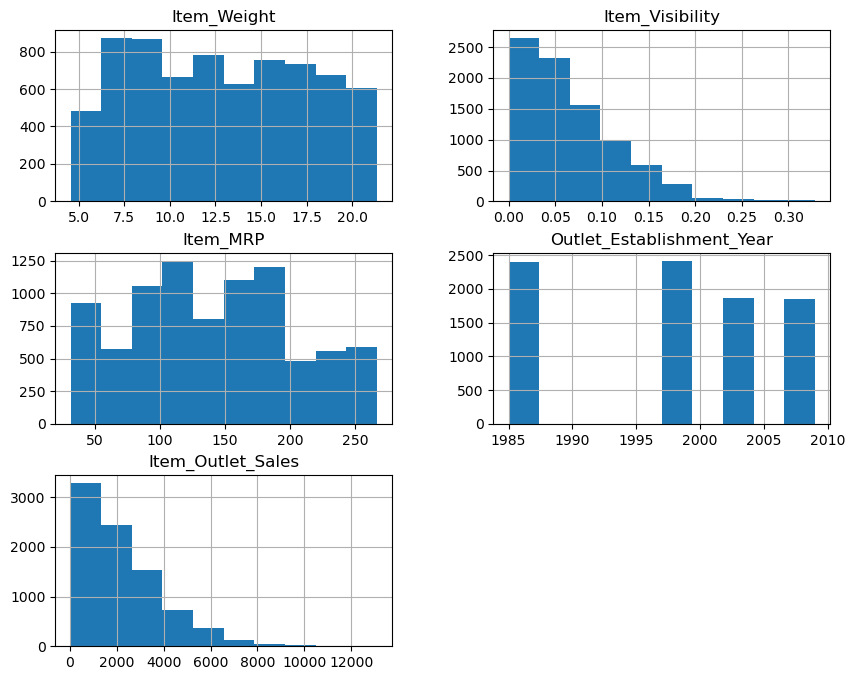

In [11]:
# Frequency Distribution of Numeric Columns:

freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(10,8))
plt.show()

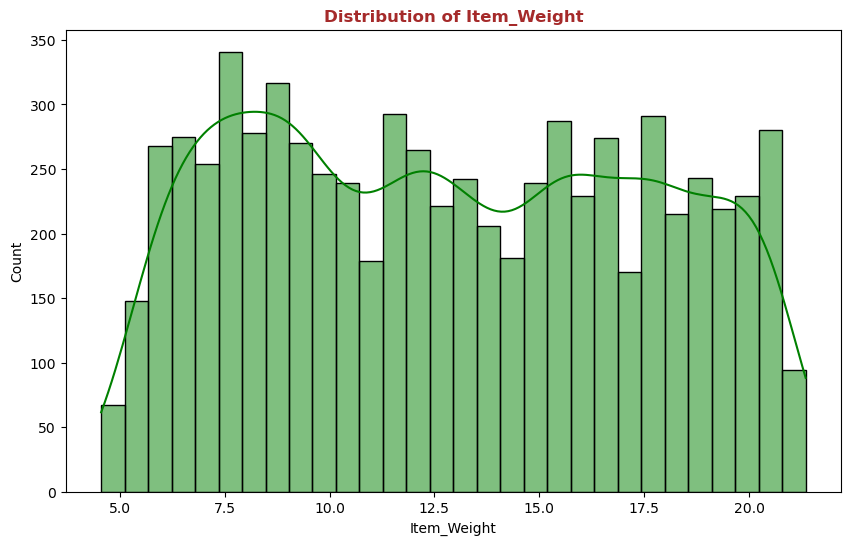

In [12]:
# Univariate Analysis for 'Item_Weight'

plt.figure(figsize=(10, 6))
sns.histplot(data['Item_Weight'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Item_Weight', color='brown', fontweight='bold')
plt.xlabel('Item_Weight')
plt.show()

###### Item weight range from 5 Kg to 20 Kg. 

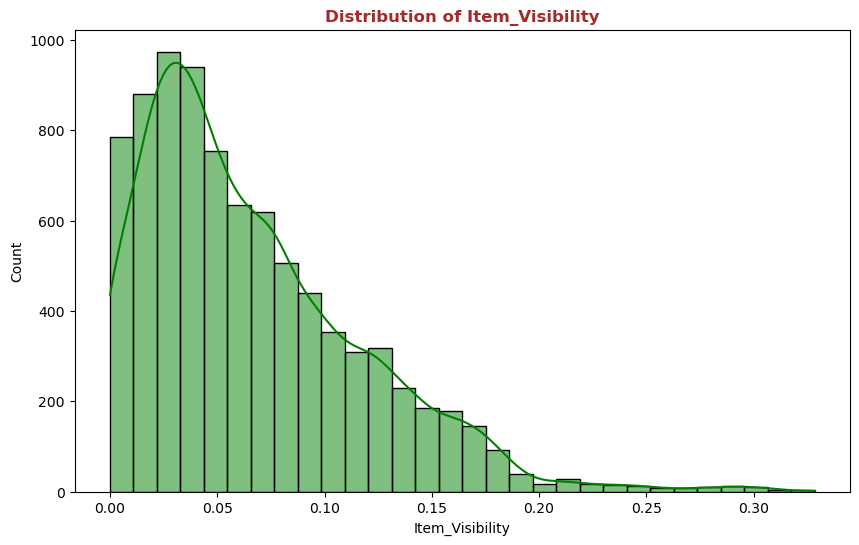

In [13]:
# Univariate Analysis for 'Item_Visibility'

plt.figure(figsize=(10, 6))
sns.histplot(data['Item_Visibility'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Item_Visibility', color='brown', fontweight='bold')
plt.xlabel('Item_Visibility')
plt.show()

##### Items having visibility less than 0.2 sold them most 

In [14]:
data.Item_Visibility.value_counts().head()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

##### Item Visibility zero for  526 counts,when a product is being sold in a store, the visibility cannot be 0.

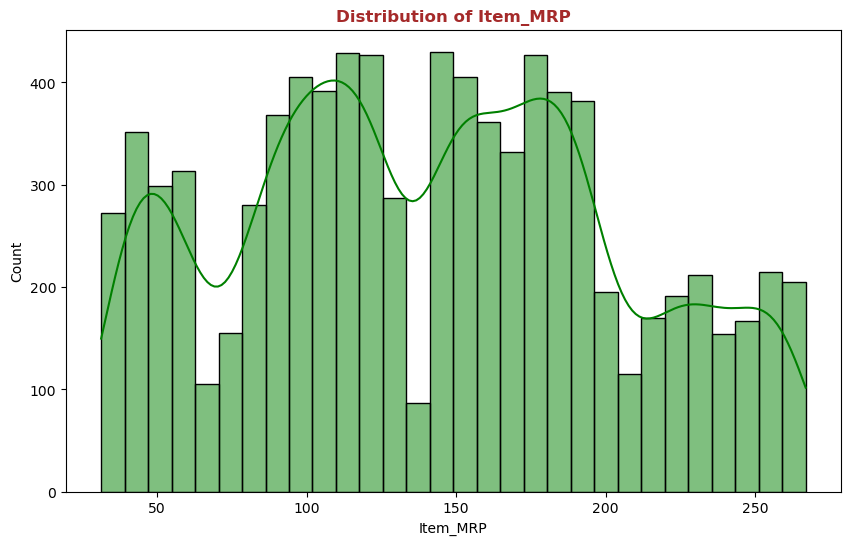

In [15]:
# Univariate Analysis for 'Item_MRP'

plt.figure(figsize=(10, 6))
sns.histplot(data['Item_MRP'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Item_MRP', color='brown', fontweight='bold')
plt.xlabel('Item_MRP')
plt.show()

######  More products in the range of 100 MRP - 180 MRP in the Item_MRP feature 

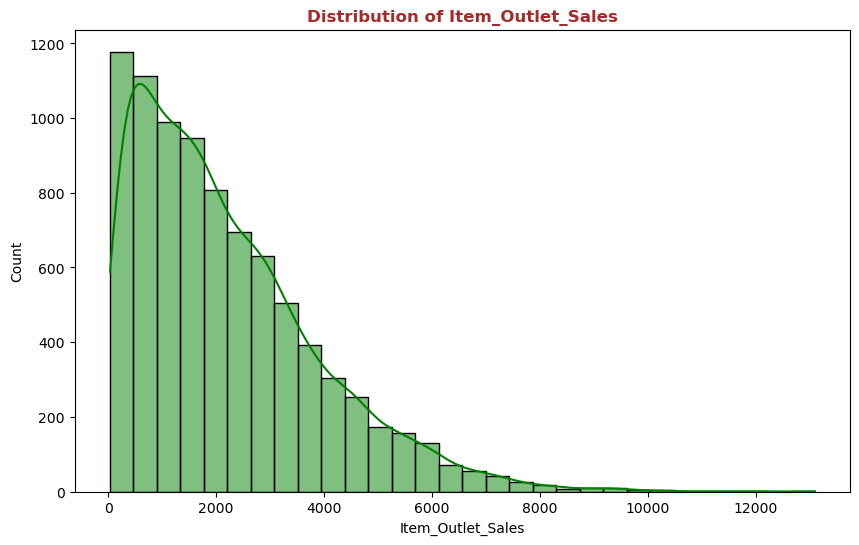

In [16]:
# Univariate Analysis for 'Item_Outlet_Sales'

plt.figure(figsize=(10, 6))
sns.histplot(data['Item_Outlet_Sales'], bins=30, kde=True,  color='green', edgecolor='black')
plt.title('Distribution of Item_Outlet_Sales', color='brown', fontweight='bold')
plt.xlabel('Item_Outlet_Sales')
plt.show()

###### Item_Outlet_Sales feature is right skewed 

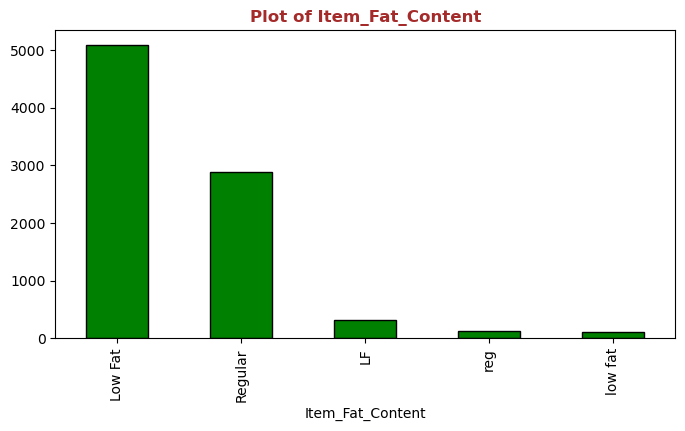

In [17]:
# Univariate Analysis for 'Item_Fat_Content'

plt.subplots(figsize=(8, 4))
data['Item_Fat_Content'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Plot of Item_Fat_Content', color='brown', fontweight='bold')
plt.xlabel('Item_Fat_Content')
plt.show()

#####  Repeated attributes which represents the same information is present in column 'Item_Fat_Content'.

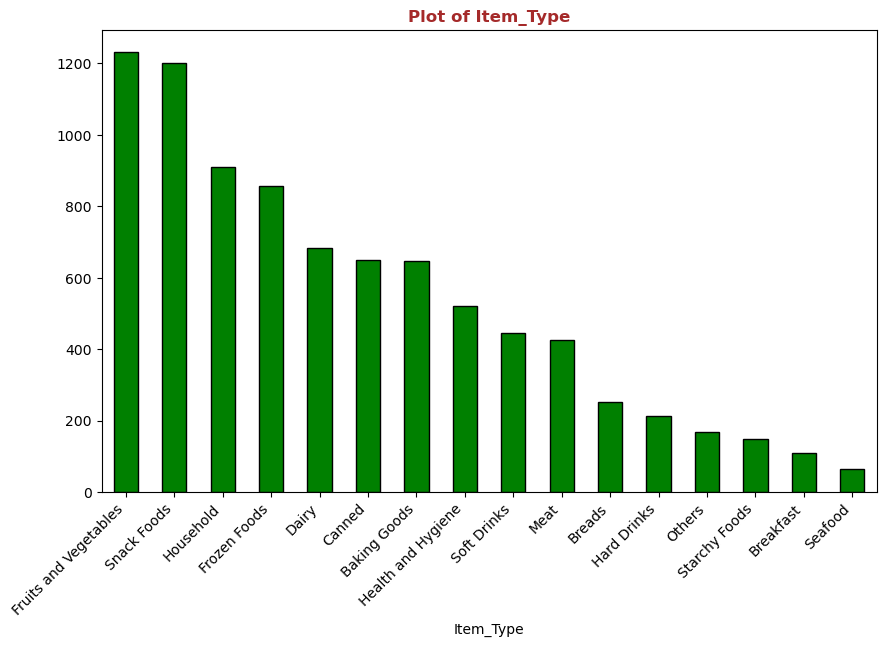

In [18]:
# Univariate Analysis for 'Item_Type'

plt.subplots(figsize=(10, 6))
data['Item_Type'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Plot of Item_Type', color='brown', fontweight='bold')
plt.xlabel('Item_Type')
plt.xticks(rotation=45, ha='right')
plt.show()

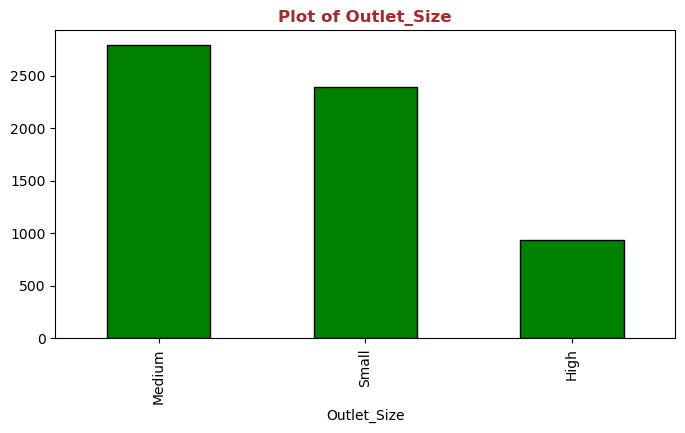

In [19]:
# Univariate Analysis for 'Outlet_Size'

plt.subplots(figsize=(8, 4))
data['Outlet_Size'].value_counts().plot(kind='bar',color='green', edgecolor='black')
plt.title('Plot of Outlet_Size', color='brown', fontweight='bold')
plt.xlabel('Outlet_Size')
plt.show()

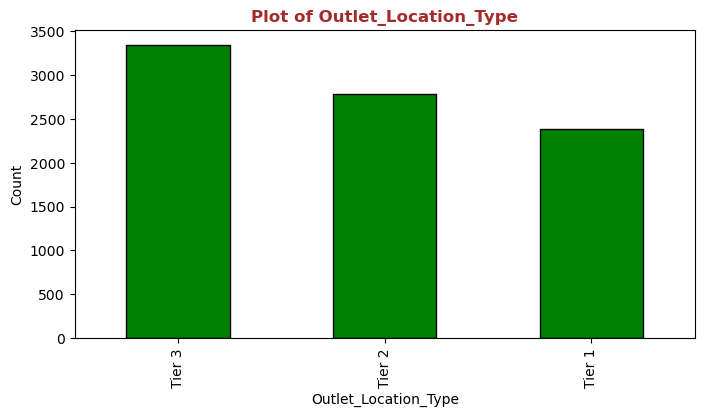

In [20]:
# Univariate Analysis for 'Outlet_Location_Type'

plt.subplots(figsize=(8, 4))
data['Outlet_Location_Type'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Plot of Outlet_Location_Type', color='brown', fontweight='bold')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Count')
plt.show()

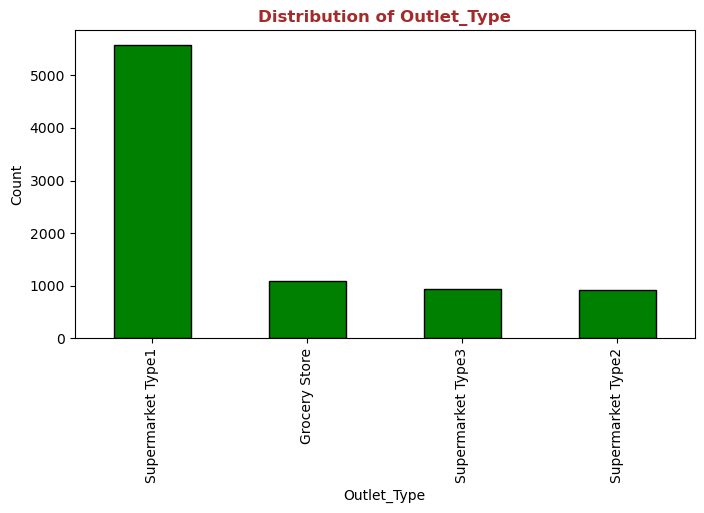

In [21]:
# Univariate Analysis for 'Outlet_Type'

plt.subplots(figsize=(8, 4))
data['Outlet_Type'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Outlet_Type', color='brown', fontweight='bold')
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.show()

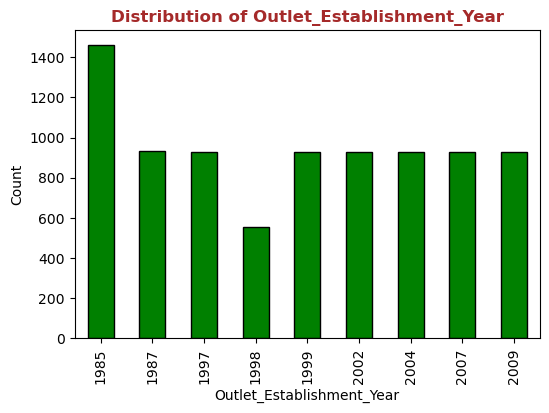

In [22]:
# Univariate Analysis for 'Outlet_Establishment_Year'

plt.subplots(figsize=(6, 4))
data['Outlet_Establishment_Year'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Outlet_Establishment_Year', color='brown', fontweight='bold')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.show()

###### Lots of stores have been established in the year 1985

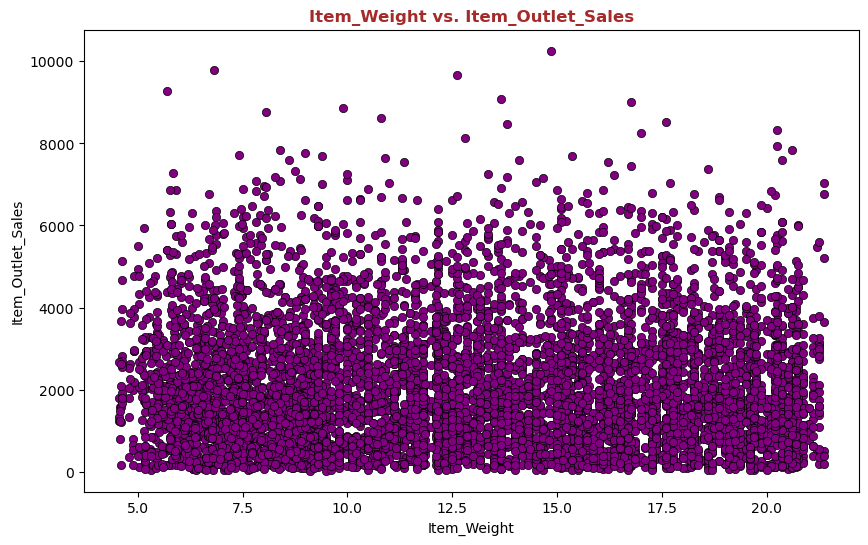

In [23]:
# Bivariate Analysis: Item_Weight vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=data, color='purple',edgecolor='black')
plt.title('Item_Weight vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

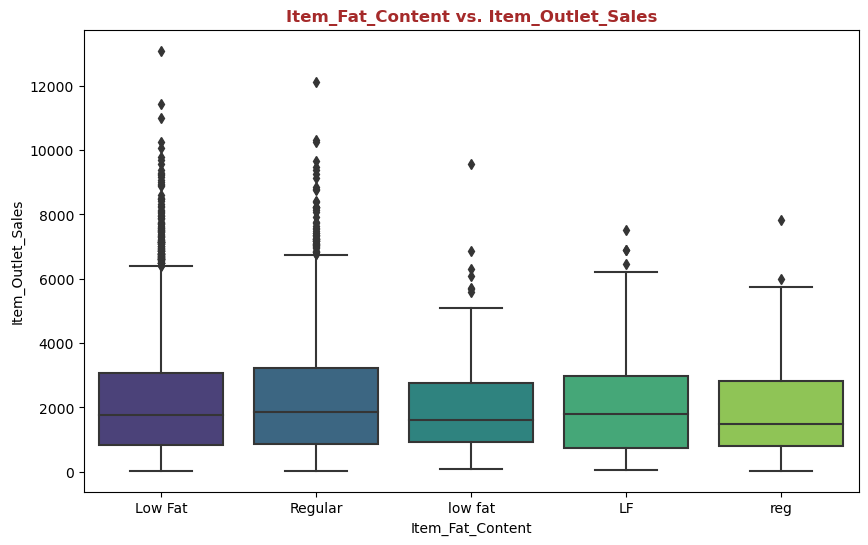

In [24]:
# Bivariate Analysis: Item_Fat_Content vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Item_Fat_Content vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.show()

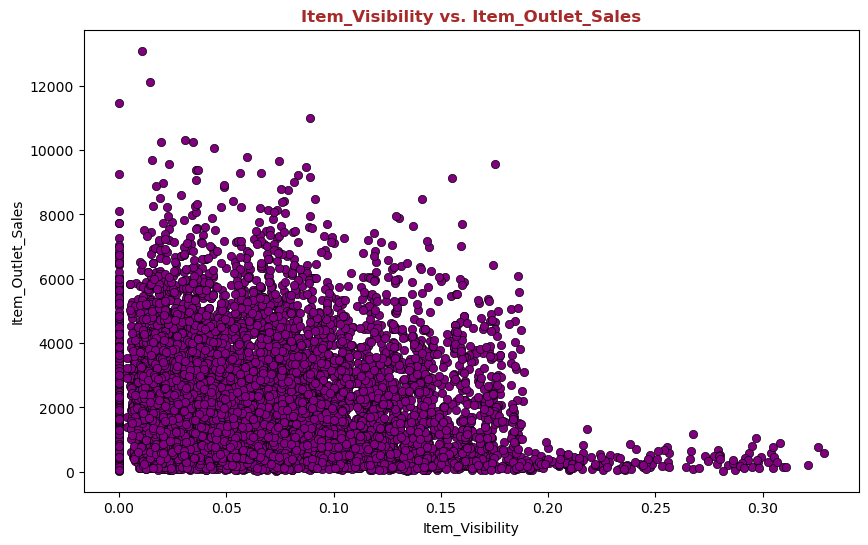

In [25]:
# Bivariate Analysis: Item_Visibility vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=data,color='purple',edgecolor='black')
plt.title('Item_Visibility vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

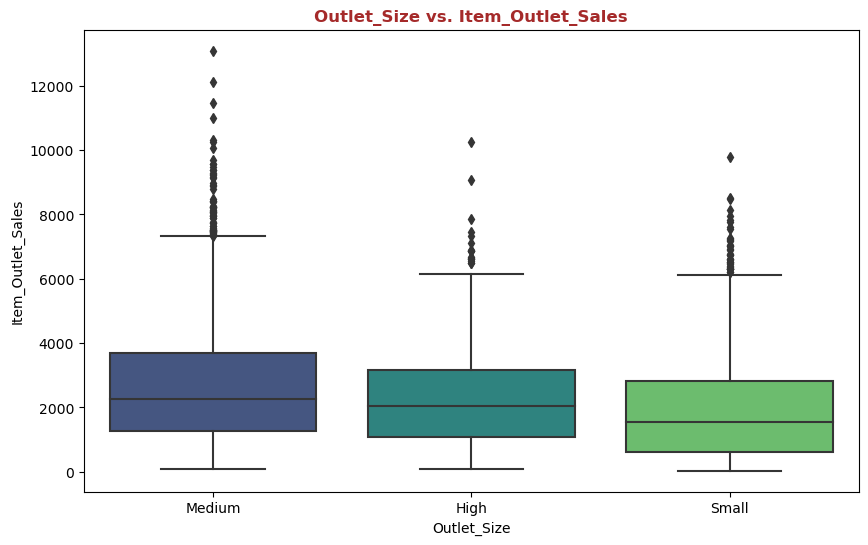

In [26]:
# Bivariate Analysis: Outlet_Size vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Outlet_Size vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.show()

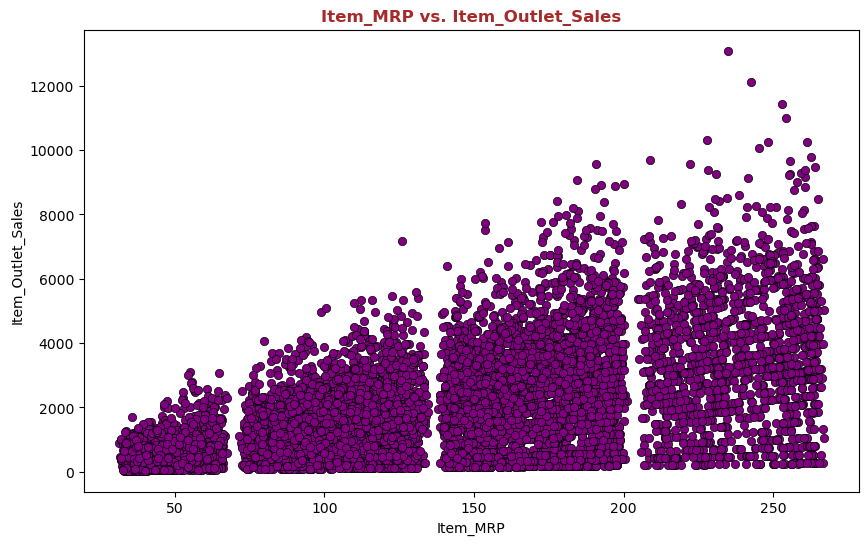

In [27]:
# Bivariate Analysis: Item_MRP vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, color='purple',edgecolor='black')
plt.title('Item_MRP vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

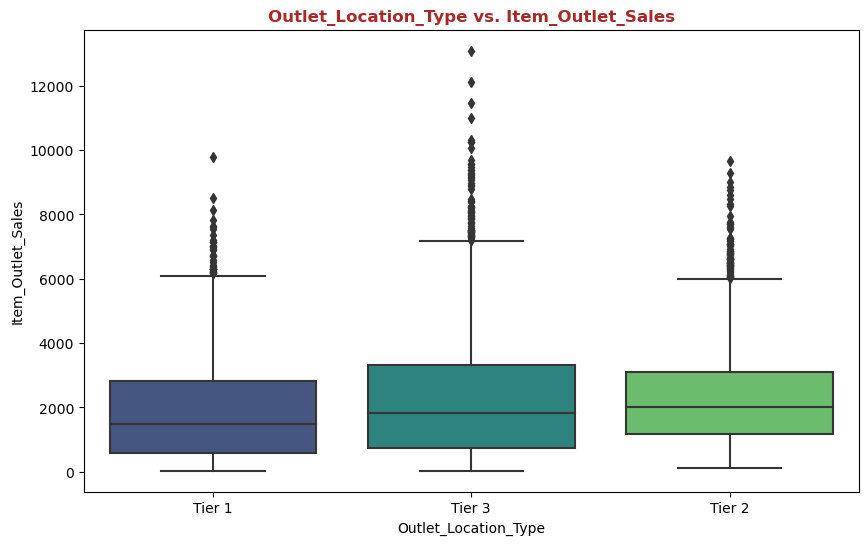

In [28]:
# Bivariate Analysis: Outlet_Location_Type vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

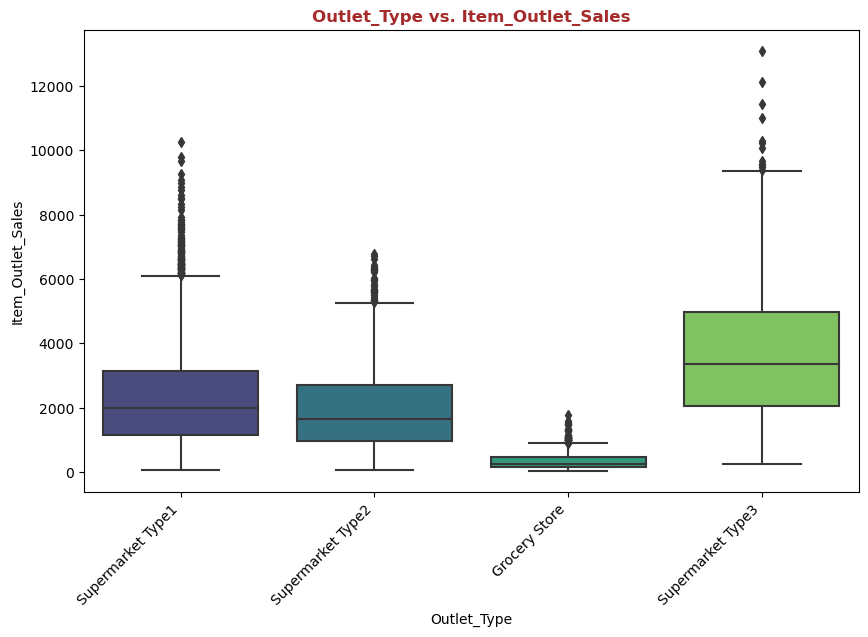

In [29]:
# Bivariate Analysis: Outlet_Type vs. Item_Outlet_Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Outlet_Type vs. Item_Outlet_Sales',color='brown', fontweight='bold')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

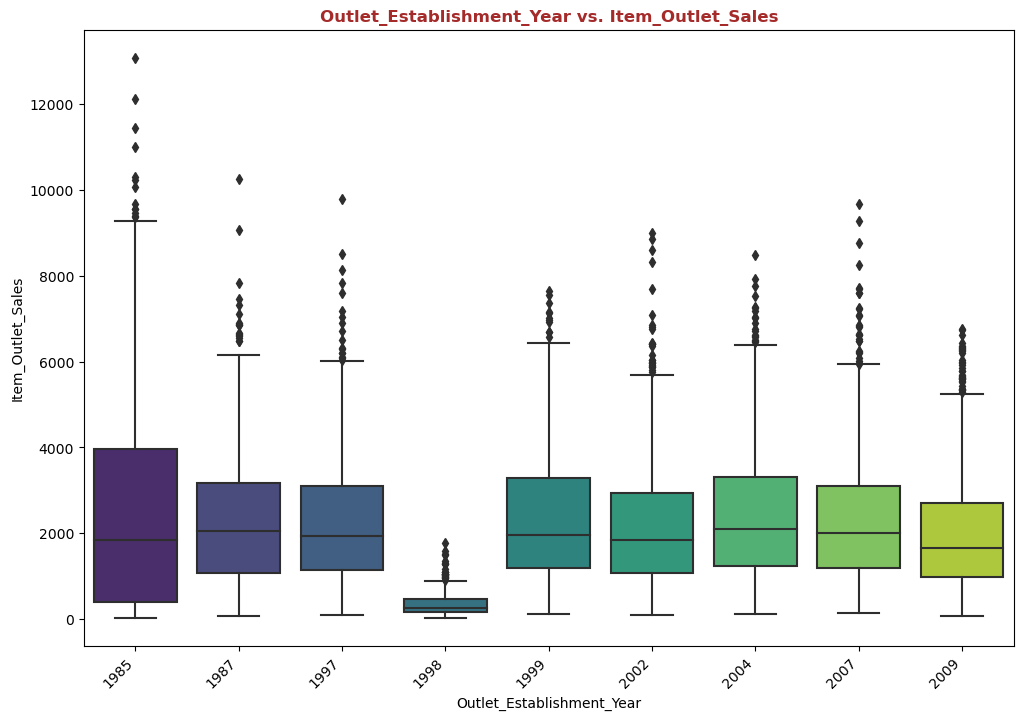

In [30]:
# Bivariate Analysis: Outlet_Establishment_Year vs. Item_Outlet_Sales

plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Outlet_Establishment_Year vs. Item_Outlet_Sales', color='brown', fontweight='bold')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

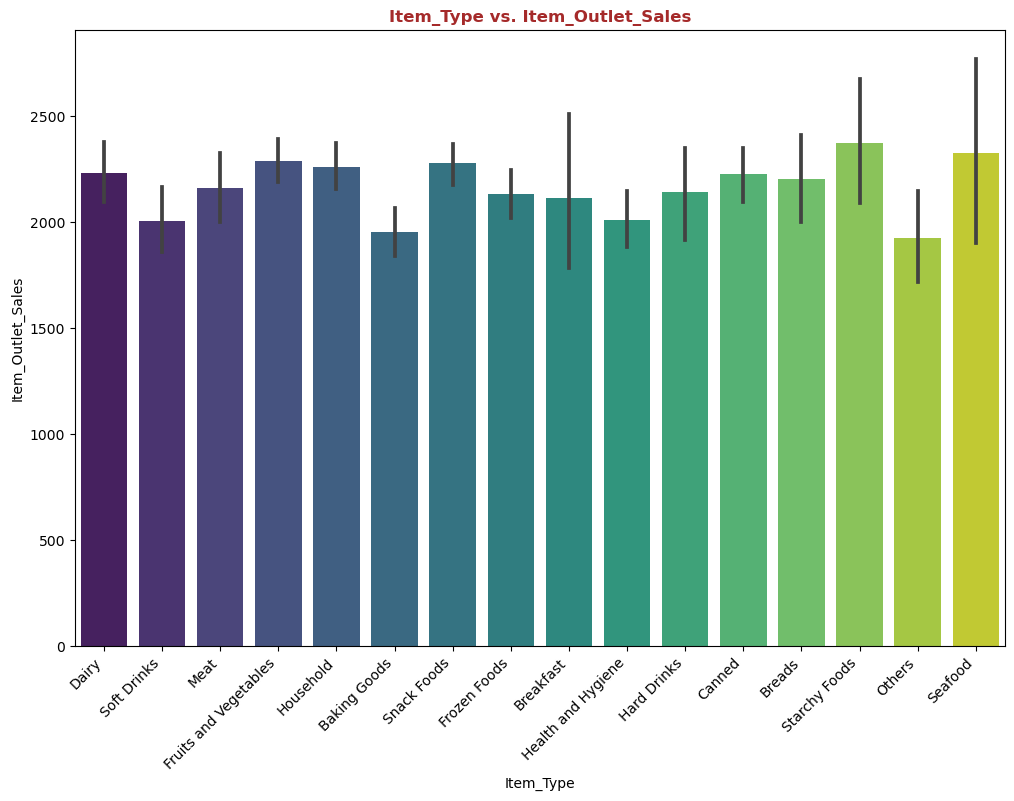

In [31]:
# Bivariate Analysis: Item_Type vs. Item_Outlet_Sales

plt.figure(figsize=(12, 8))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Item_Type vs. Item_Outlet_Sales', color='brown', fontweight='bold')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

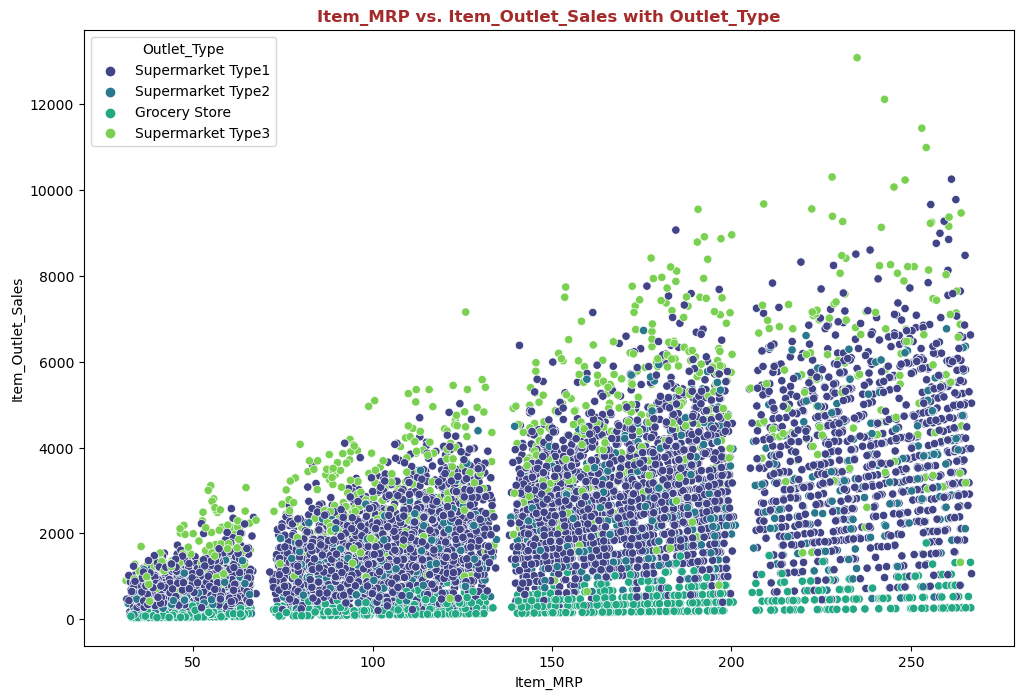

In [32]:
# Multivariate Analysis: Item_MRP vs. Item_Outlet_Sales with hue for Outlet_Type

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=data, palette='viridis')
plt.title('Item_MRP vs. Item_Outlet_Sales with Outlet_Type',color='brown', fontweight='bold')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.legend(title='Outlet_Type')
plt.show()

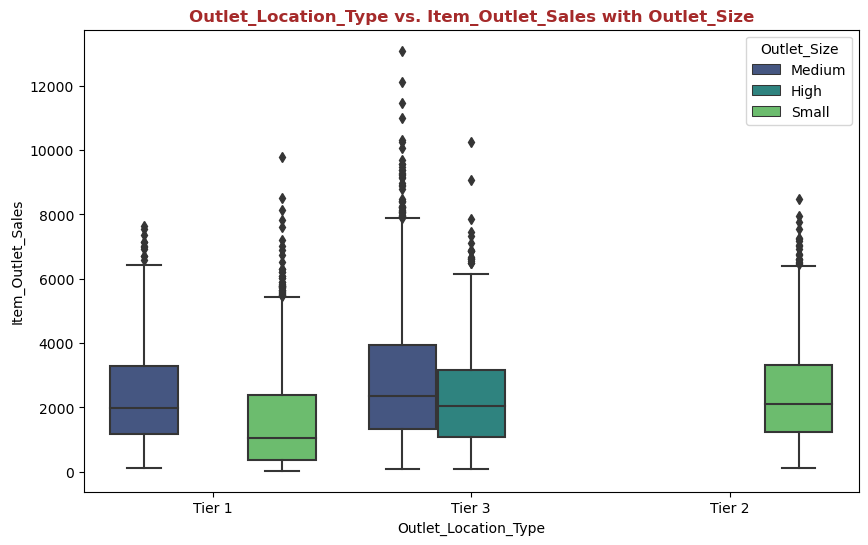

In [33]:
# Multivariate Analysis: Outlet_Location_Type vs. Item_Outlet_Sales with hue for Outlet_Size

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=data, palette='viridis')
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales with Outlet_Size',color='brown', fontweight='bold')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.legend(title='Outlet_Size')
plt.show()

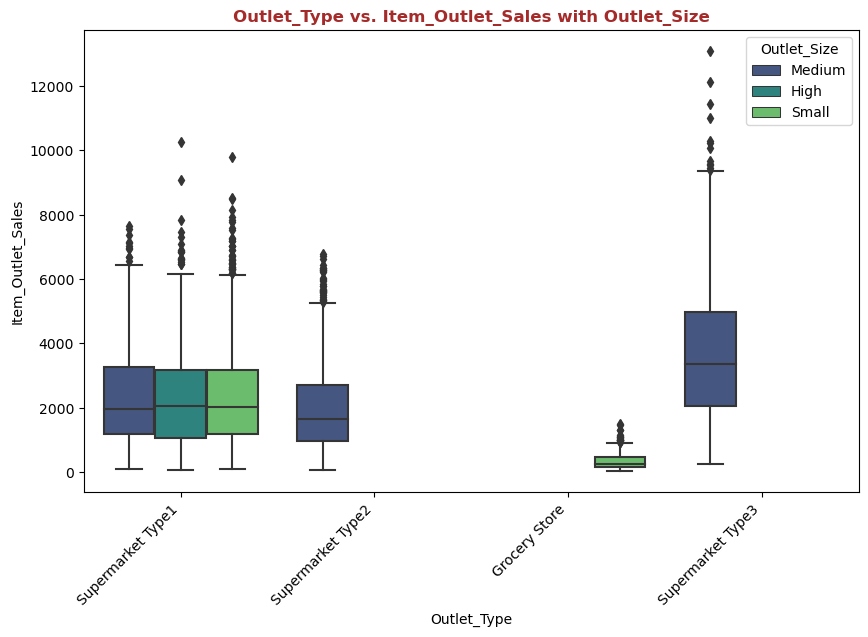

In [34]:
# Multivariate Analysis: Outlet_Type vs. Item_Outlet_Sales with hue for Outlet_Size

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=data, palette='viridis')
plt.title('Outlet_Type vs. Item_Outlet_Sales with Outlet_Size',color='brown', fontweight='bold')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outlet_Size')
plt.show()

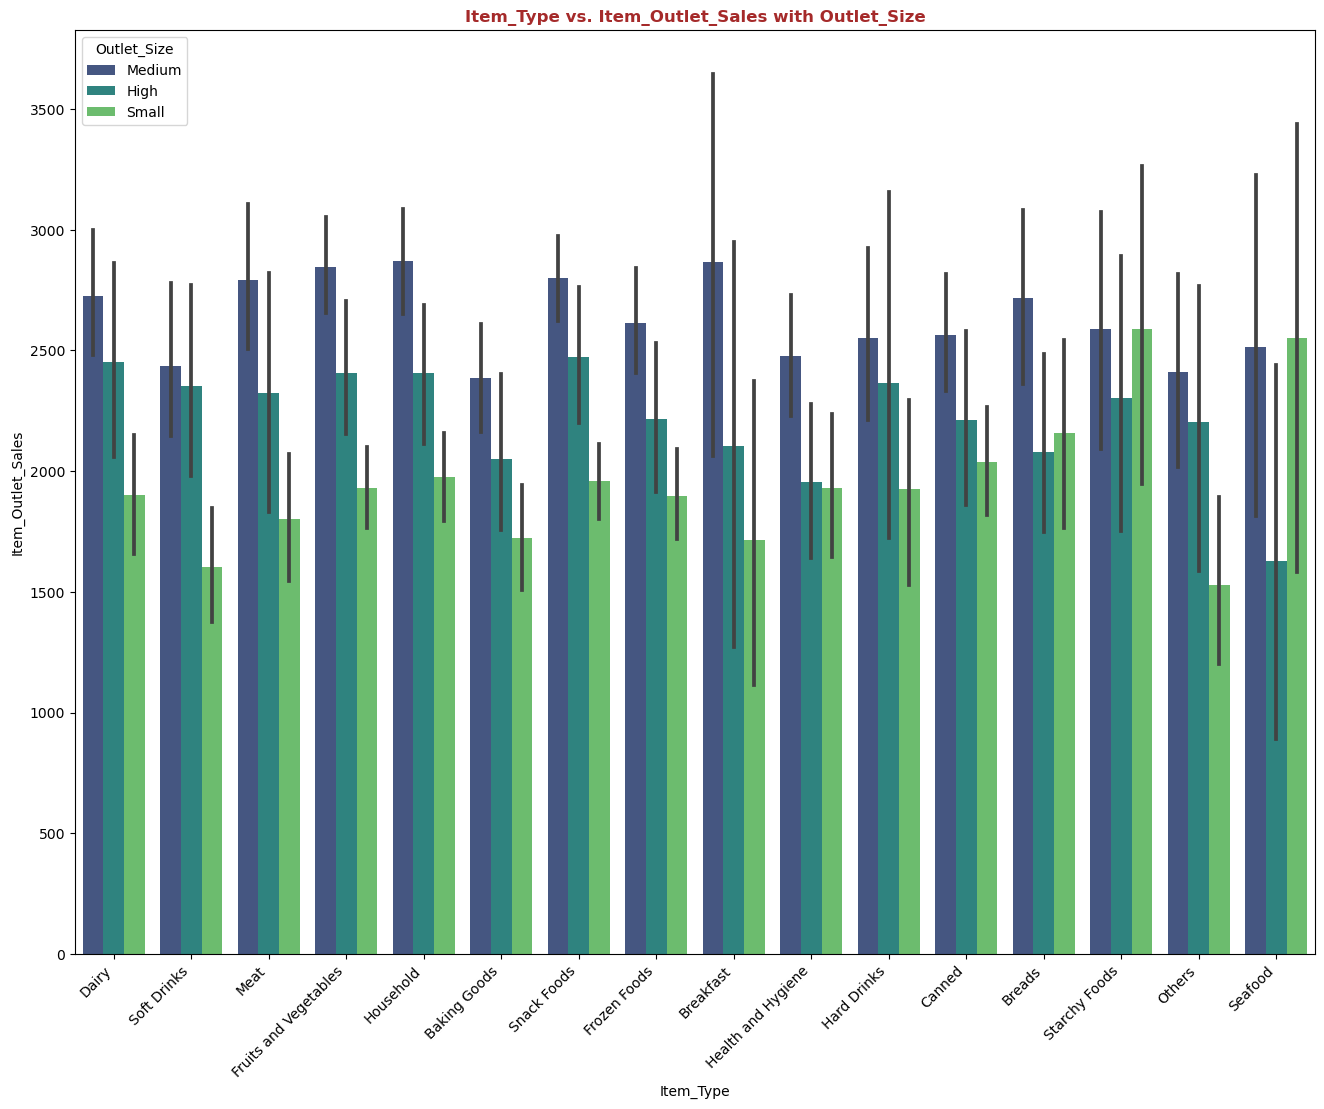

In [35]:
# Multivariate Analysis: Item_Type vs. Item_Outlet_Sales with hue for Outlet_Size

plt.figure(figsize=(16, 12))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=data, palette='viridis')
plt.title('Item_Type vs. Item_Outlet_Sales with Outlet_Size', color='brown', fontweight='bold')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outlet_Size')
plt.show()

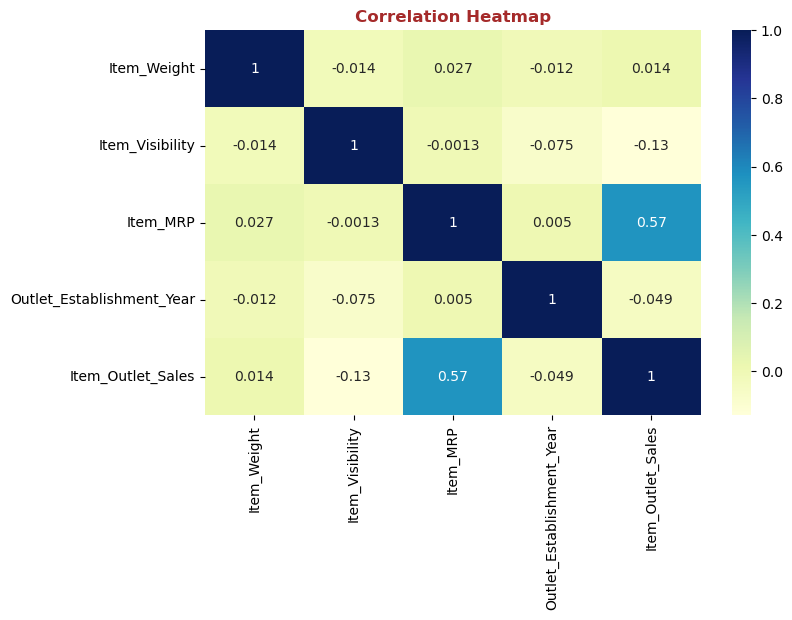

In [36]:
# Visualizing Correlation

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

plt.title("Correlation Heatmap",color='brown', fontweight='bold')
plt.show()

#####  Positive Correlation is between 'Item_MRP' and 'Item_Outlet_Sales' 

## <font color = blue>Data Preprocessing and Feature Engineering:

### <font color = blue>Data Cleaning:

###  Missing Value Handling:

In [37]:
# Check for missing values:

data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Missing Values are present in the columns 'Item_Weight ' & 'Outlet_Size'

In [38]:
# Filling the missing values in the Numerical columns of the train dataset with the median value of the respective column:

for col in ['Item_Weight']:
    data[col] = data[col].fillna(data[col].median())

In [39]:
# Filling the missing values in the Categorical column of the train dataset with the mode value of the respective column:

for col in ['Outlet_Size']:
    data[col]=data[col].fillna(data[col].mode()[0])

In [40]:
# Check for missing values:

data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outlier Handling:

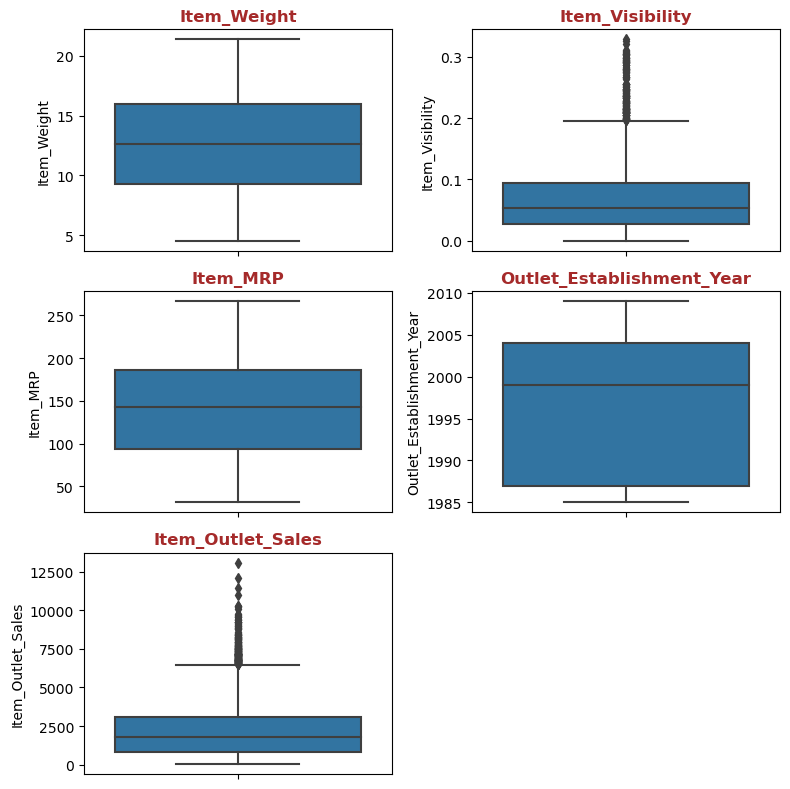

In [41]:
# Check for missing values:

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols.columns)
num_rows = int(np.ceil(num_cols / 2))

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[column], ax=axs[i])
    axs[i].set_title(column,color='brown', fontweight='bold')

# Hide empty subplots if there are an odd number of plots
if num_cols % 2 != 0:
    axs[-1].axis('off')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

#### Outliers are present in the columns 'Item_Visibility ' & 'Item_Outlet_Sales'

In [42]:
# To handle the outliers we are using the flooring and capping technique

Q1 = np.percentile(data['Item_Visibility'],25,interpolation='midpoint')
Q2 = np.percentile(data['Item_Visibility'],50,interpolation='midpoint')
Q3 = np.percentile(data['Item_Visibility'],75,interpolation='midpoint')

IQR = Q3 - Q1

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [43]:
outliers = []

for x in data ['Item_Visibility'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
data['Item_Visibility'] = np.where(data['Item_Visibility'] > up_lim, up_lim, np.where(data['Item_Visibility'] <
                                                                              low_lim, low_lim,data['Item_Visibility']))

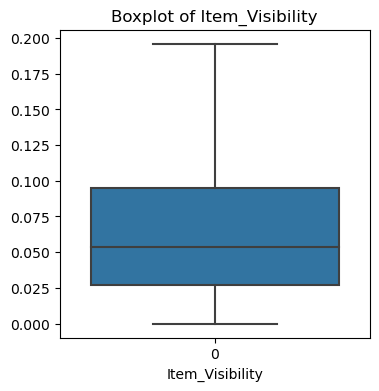

In [44]:
# Create a boxplot
plt.figure(figsize=(4,4))  
sns.boxplot(data['Item_Visibility'])

# Add labels and title
plt.xlabel('Item_Visibility')
plt.title('Boxplot of Item_Visibility')

# Show the plot
plt.show()

In [45]:
# To handle the outliers we are using the flooring and capping technique

Q1 = np.percentile(data['Item_Outlet_Sales'],25,interpolation='midpoint')
Q2 = np.percentile(data['Item_Outlet_Sales'],50,interpolation='midpoint')
Q3 = np.percentile(data['Item_Outlet_Sales'],75,interpolation='midpoint')

IQR = Q3 - Q1

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [46]:
outliers = []

for x in data ['Item_Outlet_Sales'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
data['Item_Outlet_Sales'] = np.where(data['Item_Outlet_Sales'] > up_lim, up_lim, np.where(data['Item_Outlet_Sales'] <
                                                                              low_lim, low_lim,data['Item_Outlet_Sales']))

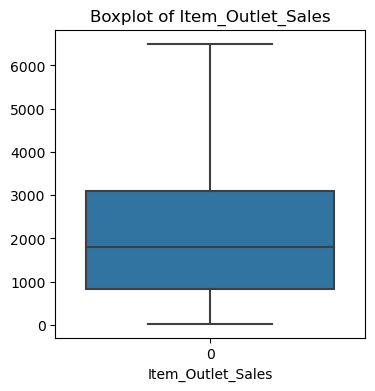

In [47]:
# Create a boxplot
plt.figure(figsize=(4,4))  
sns.boxplot(data['Item_Outlet_Sales'])

# Add labels and title
plt.xlabel('Item_Outlet_Sales')
plt.title('Boxplot of Item_Outlet_Sales')

# Show the plot
plt.show()

### <font color = blue>Feature Reduction:

In [48]:
# Create a copy of data

data1 = data.copy()

In [49]:
data1 = data1.drop(['Item_Identifier', 'Outlet_Identifier'],axis=1)

In [50]:
# combine the repeated attributes which represents the same information in column 'Item_Fat_Content'

data1['Item_Fat_Content'] = data1['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

data1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [51]:
# check for 'Item_Visibility'

sum(data1['Item_Visibility']==0)

526

##### We have some missing values for this attribute.Treat 0's as missing values 

In [52]:
# Replace zeros in 'Item_Visibility' with mean

data1.loc[:, 'Item_Visibility'].replace([0], [data1['Item_Visibility'].mean()], inplace=True)

sum(data1['Item_Visibility']==0)

0

### <font color = blue>Encoding:

In [53]:
# Create a copy of data1
df1 = data1.copy()

# One-hot encode the copied DataFrame
df1 = pd.get_dummies(df1)

In [54]:
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.065307,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.065307,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## <font color = blue> Train and Evaluate the models by applying Regression Algorithms:

In [55]:
# Selecting Target(y) column and Feature(x) columns

x = df1.drop(['Item_Outlet_Sales'],axis=1)  #Independent variable
y = df1['Item_Outlet_Sales']  #Dependent variable

###  <font color = blue> Standarization :

In [56]:
# Store the original column names before scaling
original_columns = x.columns.tolist()

# Initialize the StandardScaler:
std_scl = StandardScaler()

# Fit and transform the feature set:
x = std_scl.fit_transform(x)

# Convert the standardized array back to a Pandas DataFrame
x = pd.DataFrame(x, columns=original_columns)

In [57]:
# Generate descriptive statistics for the DataFrame:
x.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,...,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,2.192570e-16,7.086253e-18,-1.579818e-16,1.156560e-14,1.075443e-16,2.428084e-17,-3.918281e-17,4.043332e-17,-1.083780e-17,8.586871e-17,...,8.336768e-19,9.837386e-17,5.262585e-17,5.460583e-17,2.667766e-17,1.250515e-17,4.043332e-17,2.459347e-17,1.250515e-17,-3.167972e-17
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,...,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.953734e+00,-1.433110e+00,-1.761688e+00,-1.532846e+00,-1.354743e+00,-7.381472e-01,-2.868549e-01,-1.741934e-01,-1.143460e-01,-2.870943e-01,...,-3.503955e-01,-1.251866e+00,-6.238927e-01,-6.238927e-01,-6.966784e-01,-8.047318e-01,-3.815292e-01,-1.375891e+00,-3.495506e-01,-3.510283e-01
25%,-8.288209e-01,-7.900104e-01,-7.574307e-01,-1.293934e+00,-1.354743e+00,-7.381472e-01,-2.868549e-01,-1.741934e-01,-1.143460e-01,-2.870943e-01,...,-3.503955e-01,-1.251866e+00,-6.238927e-01,-6.238927e-01,-6.966784e-01,-8.047318e-01,-3.815292e-01,-1.375891e+00,-3.495506e-01,-3.510283e-01
50%,-5.048970e-02,-1.486406e-01,3.243893e-02,1.395408e-01,7.381472e-01,-7.381472e-01,-2.868549e-01,-1.741934e-01,-1.143460e-01,-2.870943e-01,...,-3.503955e-01,7.988075e-01,-6.238927e-01,-6.238927e-01,-6.966784e-01,-8.047318e-01,-3.815292e-01,7.268019e-01,-3.495506e-01,-3.510283e-01
75%,7.538647e-01,5.502046e-01,7.170372e-01,7.368218e-01,7.381472e-01,1.354743e+00,-2.868549e-01,-1.741934e-01,-1.143460e-01,-2.870943e-01,...,-3.503955e-01,7.988075e-01,1.602840e+00,1.602840e+00,1.435383e+00,1.242650e+00,-3.815292e-01,7.268019e-01,-3.495506e-01,-3.510283e-01
max,2.019540e+00,2.759790e+00,2.021724e+00,1.334103e+00,7.381472e-01,1.354743e+00,3.486083e+00,5.740747e+00,8.745388e+00,3.483175e+00,...,2.853918e+00,7.988075e-01,1.602840e+00,1.602840e+00,1.435383e+00,1.242650e+00,2.621031e+00,7.268019e-01,2.860816e+00,2.848773e+00


In [58]:
# Hold Out Techiniques:

#Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [59]:
# Function to train and evaluate models

def train_and_evaluate_models(model, algorithm_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Cross-validated score
    cv_score = cross_val_score(model, x_train, y_train, cv=5)  

    # Print results
    print(f"Results for {algorithm_name}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2):", r2)

## <font color = blue> Model Training

### 1.  Linear Regression

In [60]:
model1 = LinearRegression()
train_and_evaluate_models(model1, "Linear Regression" ,x_train, y_train, x_test, y_test)

Results for Linear Regression:
Mean Absolute Error (MAE): 768.1919452557415
Mean Squared Error (MSE): 1019093.0374385508
Root Mean Squared Error (RMSE): 1009.5013806025977
R-squared (R2): 0.5930118622681158


###  2. Regularized Linear Regression (Lasso)

In [61]:
model2 =  Lasso(alpha=0.01) 
train_and_evaluate_models(model2,"Lasso Regression", x_train, y_train, x_test, y_test)

Results for Lasso Regression:
Mean Absolute Error (MAE): 768.1928179510147
Mean Squared Error (MSE): 1019094.2162265988
Root Mean Squared Error (RMSE): 1009.5019644491034
R-squared (R2): 0.5930113915036861


###  3. Regularized Linear Regression (Ridge)

In [62]:
model3 = Ridge(alpha=0.01)
train_and_evaluate_models(model3,"Ridge Regression", x_train, y_train, x_test, y_test)

Results for Ridge Regression:
Mean Absolute Error (MAE): 768.1895560607845
Mean Squared Error (MSE): 1019085.0543449459
Root Mean Squared Error (RMSE): 1009.4974266163069
R-squared (R2): 0.593015050420993


### 4. Random Forest Regressor

In [63]:
model4 = RandomForestRegressor(n_estimators=100, random_state=42)
train_and_evaluate_models(model4,"Random Forest Regression", x_train, y_train, x_test, y_test)

Results for Random Forest Regression:
Mean Absolute Error (MAE): 740.9920136604105
Mean Squared Error (MSE): 1066725.7773135474
Root Mean Squared Error (RMSE): 1032.8241754110654
R-squared (R2): 0.5739891043994937


### 5. XGBoost Regressor

In [64]:
model5 = XGBRegressor(n_estimators=100, random_state=42)
train_and_evaluate_models(model5,"XGBoost Regression", x_train, y_train, x_test, y_test)

Results for XGBoost Regression:
Mean Absolute Error (MAE): 760.1245730721522
Mean Squared Error (MSE): 1130810.4170078982
Root Mean Squared Error (RMSE): 1063.3957010482495
R-squared (R2): 0.548396065090759


### 6. Gradient Boosting Regressor

In [65]:
model6 = GradientBoostingRegressor(n_estimators=100, random_state=42)  
train_and_evaluate_models(model6, "Gradient Boosting Regression", x_train, y_train, x_test, y_test)

Results for Gradient Boosting Regression:
Mean Absolute Error (MAE): 699.8527617170358
Mean Squared Error (MSE): 949259.0862226086
Root Mean Squared Error (RMSE): 974.2992795966794
R-squared (R2): 0.6209009643537036


In [66]:
# List of regression models
models = [
    (LinearRegression(), "Linear Regression"),
    (Lasso(alpha=0.01), "Lasso Regression"),
    (Ridge(alpha=0.01), "Ridge Regression"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest Regression"),
    (XGBRegressor(n_estimators=100, random_state=42), "XGBoost Regression"),
    (GradientBoostingRegressor(n_estimators=100, random_state=42), "Gradient Boosting Regression")
]

best_model = None
best_r2_score = 0

# Iterate over the regression models
for model, algorithm_name in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)

    # Check if this model has higher R2 score
    if r2 > best_r2_score:
        best_model = algorithm_name
        best_r2_score = r2

# Print the best regression model and its R2 score
print(f"The best regression model is {best_model} with an R-squared score of {best_r2_score}")

The best regression model is Gradient Boosting Regression with an R-squared score of 0.6209009643537036


## <font color = blue>Hyperparameter Tuning:

## <font color = green>Load the Test dataset into python environment :

In [67]:
df = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\Internship LinkedIn\Test.csv') 

### Perform similar preprocessing and feature engineering steps as we did for the Train dataset. 

### <font color = blue> Perform Data Understanding: 

In [68]:
# View first 5 rows of data

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [69]:
# Dimension of dataset

df.shape

(5681, 11)

In [70]:
# Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [71]:
# Summarize the data by generating descriptive statistics of numerical columns

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [72]:
df.describe(include = object).transpose()

,count,unique,top,freq
Item_Identifier,5681,1543,DRF48,8
Item_Fat_Content,5681,5,Low Fat,3396
Item_Type,5681,16,Snack Foods,789
Outlet_Identifier,5681,10,OUT027,624
Outlet_Size,4075,3,Medium,1862
Outlet_Location_Type,5681,3,Tier 3,2233
Outlet_Type,5681,4,Supermarket Type1,3717


In [73]:
# Number of numerical columns & Number of categorical columns in the DataFrame

numerical_columns = df.select_dtypes(include=['float', 'int']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 4
Number of Categorical Columns: 7


## <font color = blue>  Exploratory Data Analysis:

In [74]:
# Unique values: 

# Iterate over the columns

for column in df.columns:
    # Get the unique values for the column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Item_Identifier
Unique Values: ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
-----------------------
Column: Item_Weight
Unique Values: [20.75   8.3   14.6    7.315    nan  9.8   19.35   6.305  5.985 16.6
  6.59   4.785 16.75   6.135 19.85  17.85  13.6    7.1   19.2   13.65
  6.785 13.     5.825 13.8   12.8    9.5   12.5    5.78  10.395 18.35
 21.1   19.75   8.43  15.35   6.71  10.195 11.65  12.85  12.15  18.25
  5.98  12.65  13.1   20.7    7.855 13.35  17.25   8.315 21.35   5.88
  7.435 14.65  14.    18.2   17.6    7.71   7.81  16.35  16.1    5.34
  5.51   6.61   6.38   8.71  17.75   6.44  12.6    7.935 18.5    6.035
 11.8    6.26  16.5   15.7    6.635  8.155  6.175  8.18   8.355  6.905
 20.35  19.25   5.48   5.425 12.1   11.     5.765  5.44   6.13   8.195
 14.15  14.3    5.635  5.73   7.155 15.2   15.25   8.76   9.13  19.6
 10.    11.3    6.57  13.15   4.635 10.6    9.3    7.02   7.825 19.1
  7.51   8.85  17.35  15.15   5.46  13.5    8.275 10.8   15.5    4.905
  9.285

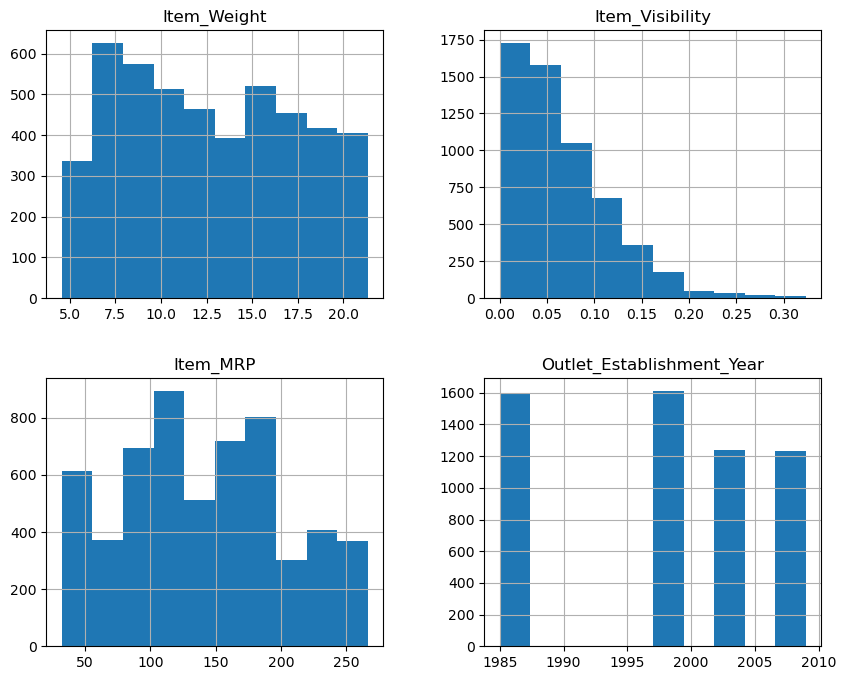

In [75]:
# Frequency Distribution of Numeric Columns:

freqgraph = df.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(10,8))
plt.show()

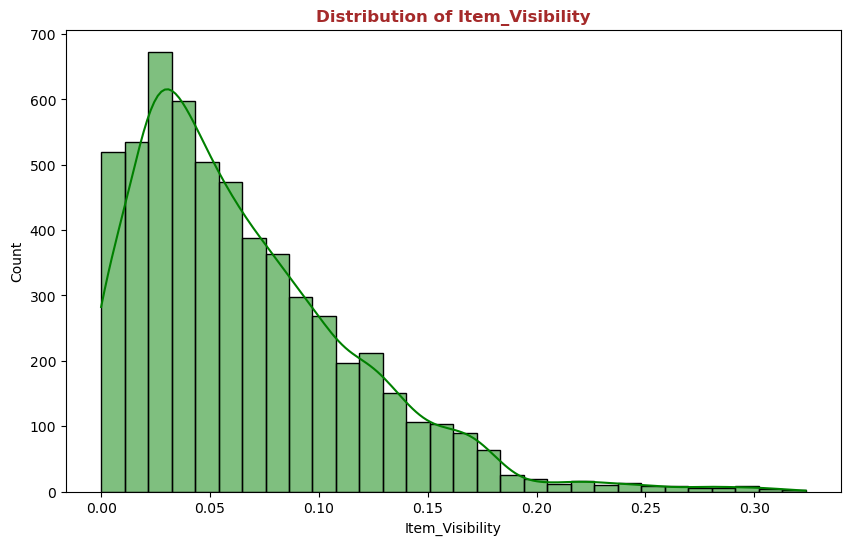

In [76]:
# Univariate Analysis for 'Item_Visibility'

plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Visibility'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Item_Visibility', color='brown', fontweight='bold')
plt.xlabel('Item_Visibility')
plt.show()

In [77]:
df.Item_Visibility.value_counts().head()

0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
Name: Item_Visibility, dtype: int64

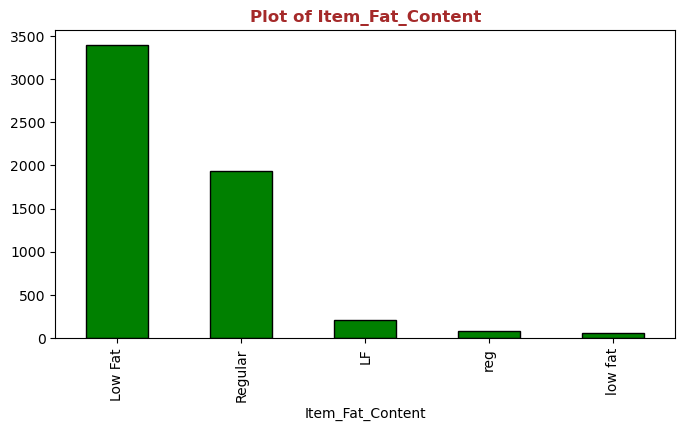

In [78]:
# Univariate Analysis for 'Item_Fat_Content'

plt.subplots(figsize=(8, 4))
df['Item_Fat_Content'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Plot of Item_Fat_Content', color='brown', fontweight='bold')
plt.xlabel('Item_Fat_Content')
plt.show()

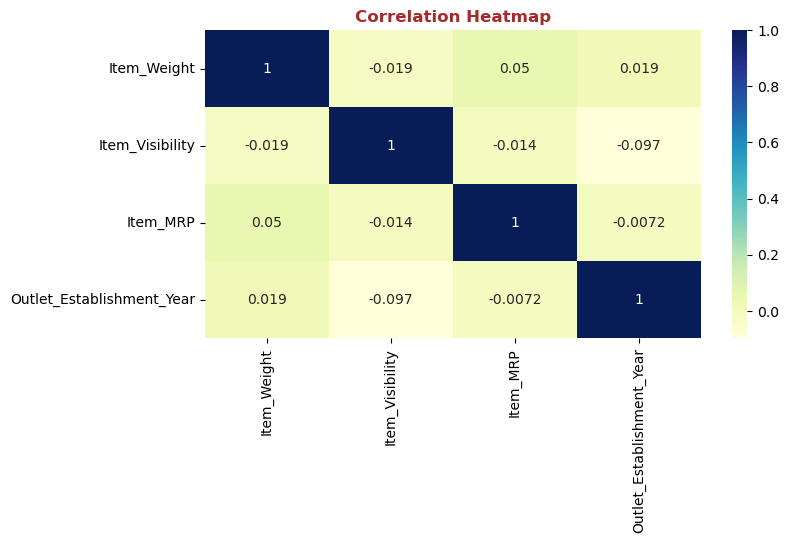

In [79]:
# Visualizing Correlation

plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

plt.title("Correlation Heatmap",color='brown', fontweight='bold')
plt.show()

## <font color = blue>Data Preprocessing and Feature Engineering:

In [80]:
# Check for missing values:

df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [81]:
# Filling the missing values in the Numerical columns of the train dfset with the median value of the respective column:

for col in ['Item_Weight']:
    df[col] = df[col].fillna(df[col].median())

In [82]:
# Filling the missing values in the Categorical column of the train dfset with the mode value of the respective column:

for col in ['Outlet_Size']:
    df[col]=df[col].fillna(df[col].mode()[0])

In [83]:
# Check for missing values:

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

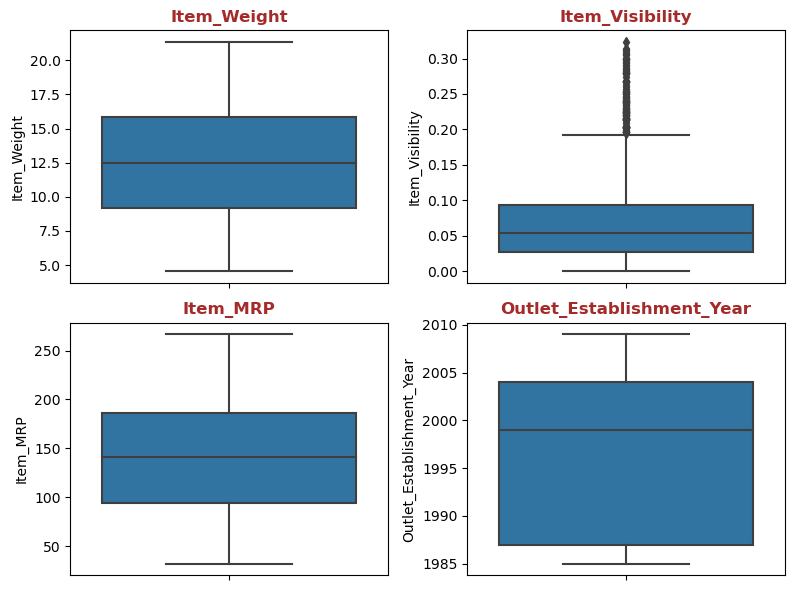

In [84]:
# Check for Outliers:

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols.columns)
num_rows = int(np.ceil(num_cols / 2))

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[column], ax=axs[i])
    axs[i].set_title(column,color='brown', fontweight='bold')

# Hide empty subplots if there are an odd number of plots
if num_cols % 2 != 0:
    axs[-1].axis('off')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

In [85]:
# To handle the outliers we are using the flooring and capping technique

Q1 = np.percentile(df['Item_Visibility'],25,interpolation='midpoint')
Q2 = np.percentile(df['Item_Visibility'],50,interpolation='midpoint')
Q3 = np.percentile(df['Item_Visibility'],75,interpolation='midpoint')

IQR = Q3 - Q1

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [86]:
outliers = []

for x in df ['Item_Visibility'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
df['Item_Visibility'] = np.where(df['Item_Visibility'] > up_lim, up_lim, np.where(df['Item_Visibility'] <
                                                                              low_lim, low_lim,df['Item_Visibility']))

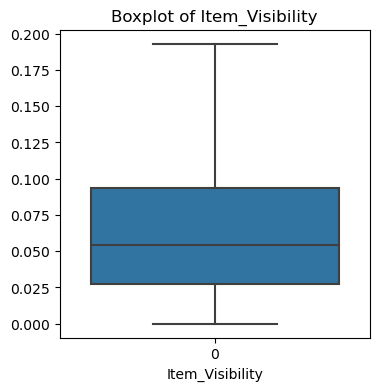

In [87]:
# Create a boxplot
plt.figure(figsize=(4,4))  
sns.boxplot(df['Item_Visibility'])

# Add labels and title
plt.xlabel('Item_Visibility')
plt.title('Boxplot of Item_Visibility')

# Show the plot
plt.show()

In [88]:
# Create a copy of df

df2 = df.copy()

In [89]:
df2 = df2.drop(['Item_Identifier', 'Outlet_Identifier'],axis=1)

In [90]:
# combine the repeated attributes which represents the same information in column 'Item_Fat_Content'

df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [91]:
# check for 'Item_Visibility'

sum(df2['Item_Visibility']==0)

353

In [92]:
# Replace zeros in 'Item_Visibility' with mean

df2.loc[:, 'Item_Visibility'].replace([0], [df2['Item_Visibility'].mean()], inplace=True)

sum(df2['Item_Visibility']==0)

0

In [93]:
# Perform Encoding

# One-hot encode the DataFrame
df2 = pd.get_dummies(df2)

In [94]:
df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.500,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [95]:
# Standarization :

x_std_test = std_scl.transform(df2)

## <font color = green>Predict Sales using the Trained Best Model (Gradient Boosting Regression Model):

In [96]:
sales_predictions = model6.predict(x_std_test)
sales_predictions

array([1550.02111607, 1349.55411301,  633.55328863, ..., 1905.23459877,
       3552.3618789 , 1299.61097601])

In [97]:
# Get the first 5 predictions on the training set
y_train_r = model6.predict(x_test[:5])

# Get the first 5 predictions on the test set
y_test_r = model6.predict(x_std_test[:5])

# Print the first 5 training predictions
print('First 5 Training Predictions:')
print(y_train_r)

# Print the first 5 testing predictions
print('First 5 Testing Predictions:')
print(y_test_r)

First 5 Training Predictions:
[1328.69556568  733.04089118  709.02911433 4621.36871771 3225.33147752]
First 5 Testing Predictions:
[1550.02111607 1349.55411301  633.55328863 2549.21742986 5245.25546495]


### Prepare the submission file and Save the Predictions to a CSV file:

In [98]:
# Create the submission DataFrame with 'Item_Identifier' and 'Outlet_Identifier'

submission = pd.DataFrame({'Item_Identifier': df['Item_Identifier'],
                            'Outlet_Identifier': df['Outlet_Identifier'],
                            'Item_Outlet_Sales': sales_predictions})
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1550.021116
1,FDW14,OUT017,1349.554113
2,NCN55,OUT010,633.553289
3,FDQ58,OUT017,2549.217430
4,FDY38,OUT027,5245.255465
...,...,...,...
5676,FDB58,OUT046,2155.907289
5677,FDD47,OUT018,2531.433418
5678,NCO17,OUT045,1905.234599
5679,FDJ26,OUT017,3552.361879


In [99]:
submission.to_csv('sales_predictions.csv', index=False)

## <font color = blue> Summary:

###### The project began with a comprehensive understanding of the problem statement involving the prediction of sales for 1559 products across 10 stores. Following an in-depth exploration of the dataset was conducted, identifying and addressing data cleaning and handling outliers. Visualizations were employed to gain insights into the relationships within the data, paving the way for informative analysis. The conversion of categorical data to numerical format facilitated the training of various models. The dataset was then split into training and test sets for model evaluation. Multiple regression models were trained and assessed for their predictive capabilities. The chosen model was employed to make predictions on the test dataset, and the final model was saved for future use. This iterative process exemplifies a robust approach to predictive modeling, combining exploratory data analysis, feature engineering, and model training for accurate sales predictions. 